# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


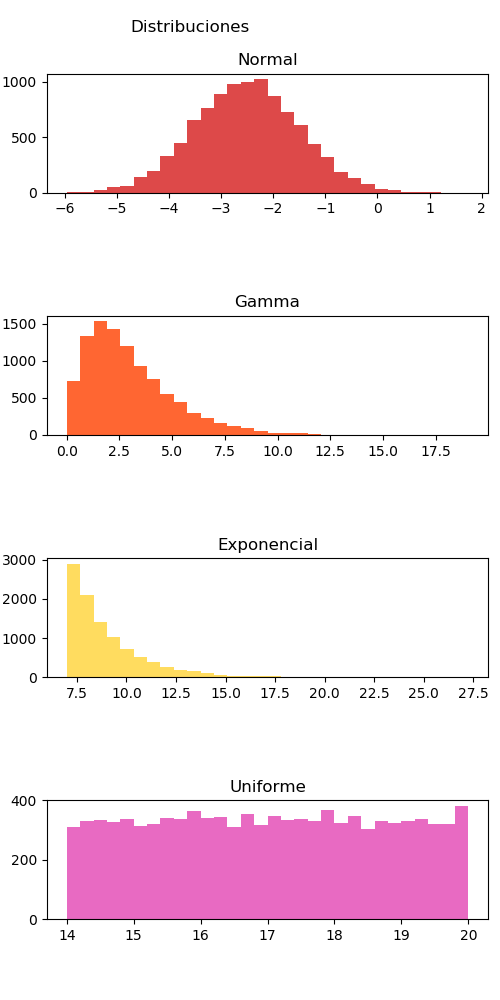

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook

fig, ([sub1, sub2, sub3, sub4]) = plt.subplots(4,1)

plt.cla()
n = 10000

# subplots re-set to standard positions
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)
# increment the number of bins in every 30th frame
bins = 30
sub1.hist(x1, bins=bins,  color='#dd4949')
sub2.hist(x2, bins=bins,  color='#ff6632')
sub3.hist(x3, bins=bins,  color='#ffdc5f')
sub4.hist(x4, bins=bins,  color='#e86ac2')

sub1.set_title('Normal')
sub2.set_title('Gamma')
sub3.set_title('Exponencial')
sub4.set_title('Uniforme')
fig.suptitle('Distribuciones', ha= 'right')
plt.tight_layout()
fig.set_size_inches(5, 10, forward=True)
fig.savefig('Distribuciones', dpi=100)

In [3]:
def update(curr):
    
    if curr == n:
        a.event_source.stop()
        
    sub1.cla()
    sub2.cla()
    sub3.cla()
    sub4.cla()

    # subplots re-set to standard positions
    x1 = np.random.normal(-2.5, 1, n)
    x2 = np.random.gamma(2, 1.5, n)
    x3 = np.random.exponential(2, n)+7
    x4 = np.random.uniform(14,20, n)

    # increment the number of bins in every 10th frame
    bins = 10 + curr

    # drawing the subplots
    sub1.hist(x1, bins=bins,  color='#dd4949')
    sub2.hist(x2, bins=bins,  color='#ff6632')
    sub3.hist(x3, bins=bins,  color='#ffdc5f')
    sub4.hist(x4, bins=bins,  color='#e86ac2')

    # set all ticks to null
    sub1.set_xticks([])
    sub2.set_xticks([])
    sub3.set_xticks([])
    sub4.set_xticks([])
    sub1.set_yticks([])
    sub2.set_yticks([])
    sub3.set_yticks([])
    sub4.set_yticks([])


    # name the subplots
    sub1.set_title('Normal')
    sub2.set_title('Gamma')
    sub3.set_title('Exponencial')
    sub4.set_title('Uniforme')
    
    # the title will change to reflect the number of bins
    fig.suptitle('# de bins: {}'.format(bins), x = 0.2)
    
    # no redundant space left for saving into mp4
    plt.tight_layout()

<IPython.core.display.Javascript object>


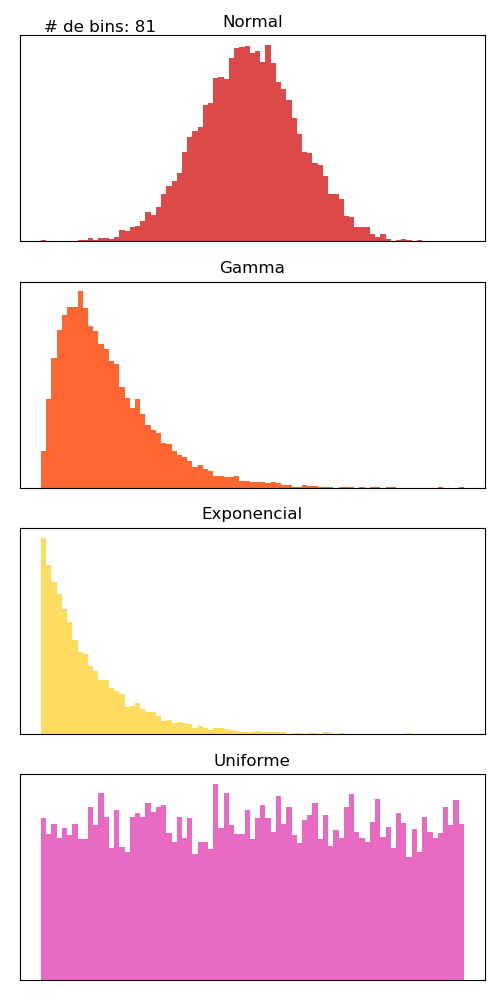

In [4]:
fig, ([sub1, sub2, sub3, sub4]) = plt.subplots(4,1)
fig.set_size_inches(5, 10, forward=True)
a = animation.FuncAnimation(fig, update, interval=100, save_count=500, blit=True, frames=100)
writergif = animation.PillowWriter(fps=30) 
a.save('Animación.gif', writer=writergif)
